In [1]:
# Video Game Sales Analysis 

# Description:
#- Understanding video game sales and predicting it

# Model Type 
### KNN, XGB, Decision Tree, Random Forest, MLP Regressor, Linear Regression
#30/10/2022

# Version - V1.0 Beta


# Goals:
#- To understand the Global video game sales
#- Understand the Top Publishers
#- Understand the Top Genres
#- Understand Sales by Continent 
#- Predict Sales by publisher
#- Compare to stock shares, pick each publisher and check stock values at the time 



# Key Insights and Notes
#- The dataset ends around the end of 2016, you can try do complete the dataset using the scrapper on the description 
#- Some of the Consoles do not exist anymore
#- Might want to consider the Publisher sales 
#- Might want to consider the genres and check for outliers insider genres (Games outside of the scope that were a success)
#- Platforms change fast, so focusing on the platform needs to be in the short term, but we don't have this data 
#- Other_Sales might be a good prospecting market 


# Fixes
#-


# Version Updates:
#- 


# Future Implementations: 
#- 
#- Analyze data with Google Data 
#- Add Publisher x Year
#- Add New parameters such as Moving Average
#- Add sales from VR glasses, PC and Mobile 
#- Hyperparameters Optimization 


# Author - Luiz Gabriel Bongiolo

#Credits and References 
#- Code used to scrape the data - https://github.com/GregorUT/vgchartzScrape
#- https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot



In [2]:
#Dataset description

# This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

# Rank - Ranking of overall sales

# Name - The games name

# Platform - Platform of the games release (i.e. PC,PS4, etc.)

# Year - Year of the game's release

# Genre - Genre of the game

# Publisher - Publisher of the game

# NA_Sales - Sales in North America (in millions)

# EU_Sales - Sales in Europe (in millions)

# JP_Sales - Sales in Japan (in millions)

# Other_Sales - Sales in the rest of the world (in millions)

# Global_Sales - Total worldwide sales.

In [3]:
#Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
import datetime


import warnings
warnings.simplefilter("ignore")


In [4]:
df = pd.read_csv("/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /vgsales.csv")

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
#Checking the data

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#Check all lines that have a Null value
#We can use this to filter missing values and evaluate if they are relevant or if we can fix it 


df[df.isnull().any(axis = 1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [7]:
#Let's fill the missing year values with forward fill 

df['Year'] = df['Year'].fillna(method="ffill")



In [8]:
#Converting the Year o Integer Type

integer_year = {'Year': 'int'}
df['Year'] = df['Year'].astype(integer_year)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [9]:
#Check again 
df[df.isnull().any(axis = 1)]

#Now we can decide if we can eliminate all this values or keep some of them 
#For example, wwe Smackdown vs. Raw 2006 has 3M Global Sales, is this relevant? It might...
#Since the publisher might not be relevant for some of the analysis we are doing, we might consider to keep this values 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,2008,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2008,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [10]:
#Lets remove all missing values 

df = df.dropna(axis=0)

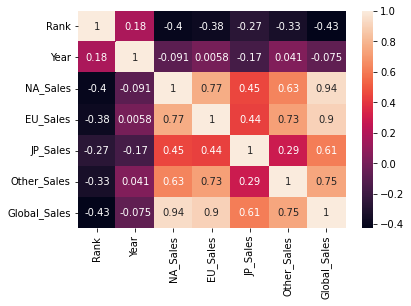

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
top_sales = df.sort_values(by=['Global_Sales'], ascending=False).head(10)

top_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


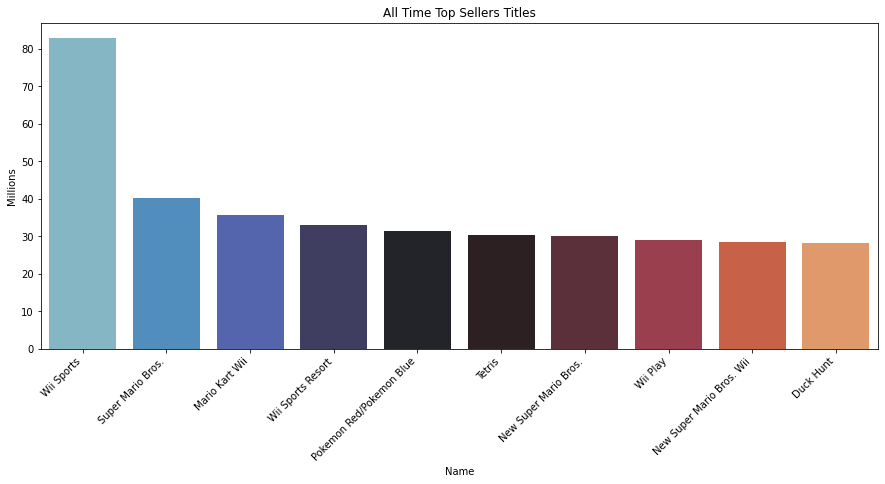

In [13]:
#Check Best Selling games of all time 

ax=plt.figure(figsize=(15,6))
sns.barplot(x="Name",y="Global_Sales", data=top_sales, palette='icefire')
plt.ylabel("Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('All Time Top Sellers Titles')

plt.show()

#Subplot Genres

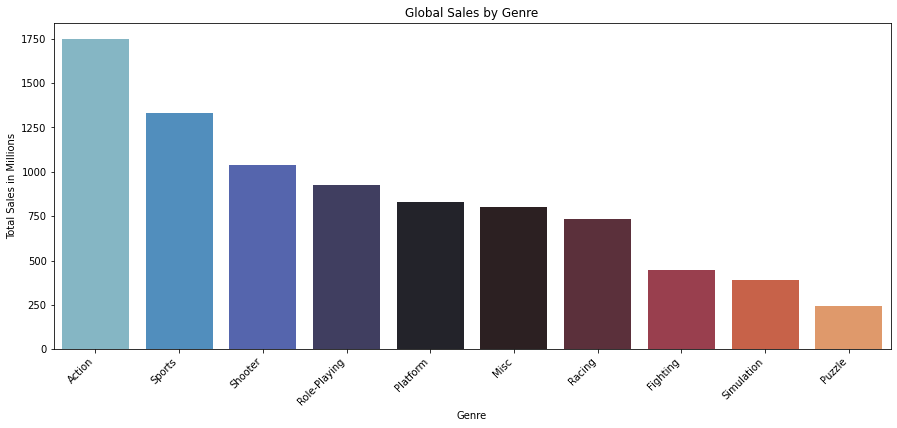

In [14]:
#Best Selling Genres 

top_genres = df.groupby(["Genre"]).agg({'Global_Sales':'sum'}).reset_index()

top_genres = top_genres.sort_values(by=["Global_Sales"], ascending=False).head(10)



bx=plt.figure(figsize=(15,6))
sns.barplot(x="Genre",y="Global_Sales", data=top_genres, palette='icefire')
plt.ylabel("Total Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Global Sales by Genre')

plt.show()

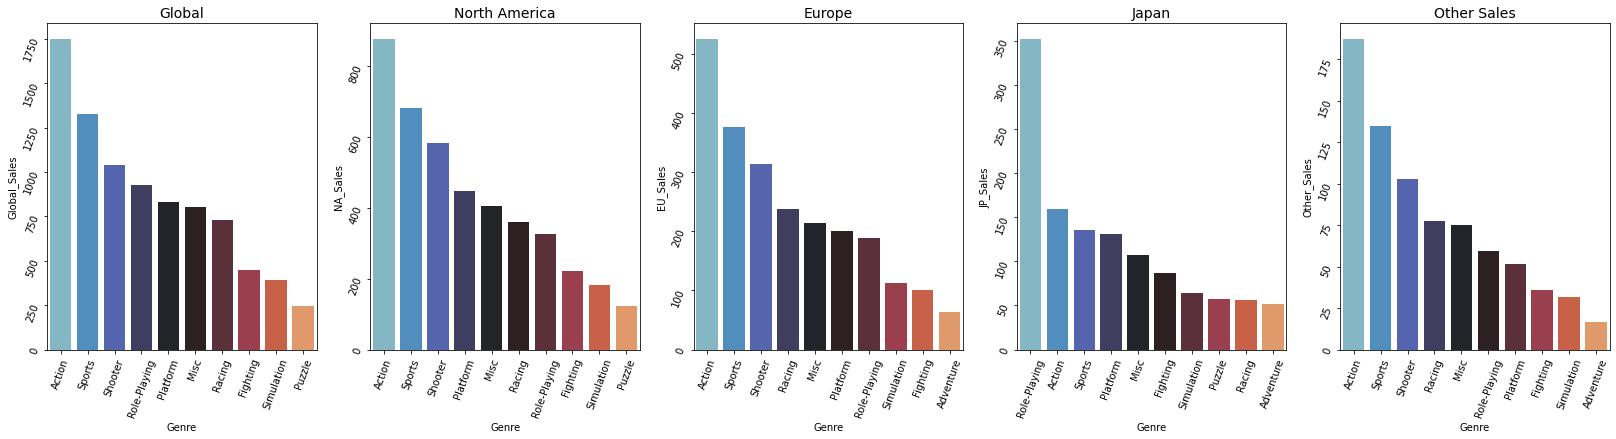

In [15]:
#Plot all Sales Charts in One 

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (28, 6))

sns.barplot(x="Genre",y="Global_Sales", ax=ax1, data=top_genres, palette='icefire').set_title("Global", fontsize = 14)
ax1.tick_params(labelrotation=70)

top_genresNA = df.groupby(["Genre"]).agg({'NA_Sales':'sum'}).reset_index()
top_genresNA = top_genresNA.sort_values(by=["NA_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="NA_Sales", ax=ax2, data=top_genresNA, palette='icefire', ci=None).set_title("North America", fontsize = 14)
ax2.tick_params(labelrotation=70)

top_genresEU = df.groupby(["Genre"]).agg({'EU_Sales':'sum'}).reset_index()
top_genresEU = top_genresEU.sort_values(by=["EU_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="EU_Sales", ax=ax3, data=top_genresEU, palette='icefire', ci=None).set_title("Europe", fontsize = 14)
ax3.tick_params(labelrotation=70)

top_genresJP = df.groupby(["Genre"]).agg({'JP_Sales':'sum'}).reset_index()
top_genresJP = top_genresJP.sort_values(by=["JP_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="JP_Sales", ax=ax4, data=top_genresJP, palette='icefire', ci=None).set_title("Japan", fontsize = 14)
ax4.tick_params(labelrotation=70)

top_genresOT = df.groupby(["Genre"]).agg({'Other_Sales':'sum'}).reset_index()
top_genresOT = top_genresOT.sort_values(by=["Other_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="Other_Sales", ax=ax5, data=top_genresOT, palette='icefire', ci=None).set_title("Other Sales", fontsize = 14)
ax5.tick_params(labelrotation=70)



In [16]:
#North America and Europe sell together much more than Japan
#Focusing on Japan Sales would be a challenge 

In [17]:
#Sort by year and platform Global Sales 

top_platforms = df.sort_values( by="Year", ascending=False)
top_platforms.set_index("Year", inplace=True)
#top_platforms = df.sort_values( by="Global_Sales", ascending=[False]).head(10)
top_platforms.reset_index(inplace=True)
top_platforms = top_platforms.groupby(["Year","Platform"]).agg({'Global_Sales':'sum'}).reset_index()


#Last 10 Years Platform Global Sales 
top_platforms[80:180]



,Year,Platform,Global_Sales
80,1997,PC,11.26
81,1997,PS,136.24
82,1997,PS2,5.23
83,1997,SAT,6.77
84,1997,SNES,0.99
...,...,...,...
175,2005,X360,8.64
176,2005,XB,49.17
177,2006,2600,0.27
178,2006,DS,121.22


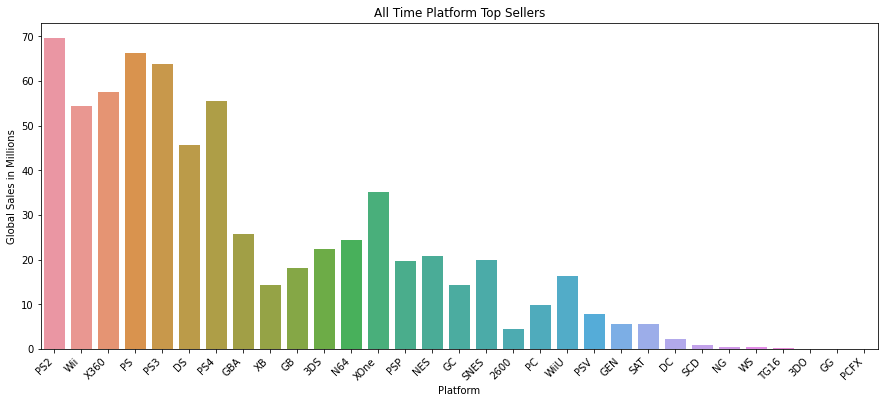

In [18]:
#All Time platform Global Sales 

top_platforms = top_platforms.sort_values( by="Global_Sales", ascending=False)

cx=plt.figure(figsize=(15,6))
sns.barplot(x="Platform",y="Global_Sales", data=top_platforms, ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All Time Platform Top Sellers")


plt.show()

Text(0.5, 1.0, 'All time Publisher Top Seller')

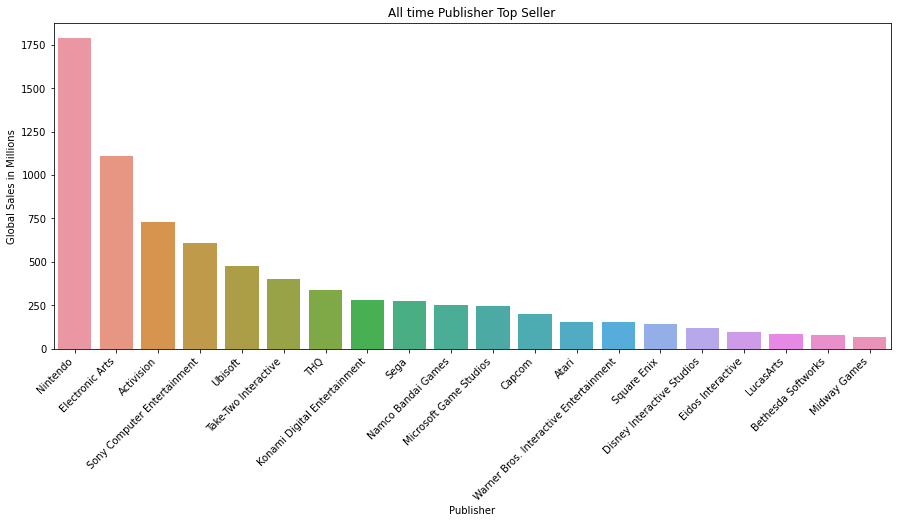

In [19]:
#All time Publisher Top seller


top_publisher = df.groupby(["Publisher"]).agg({'Global_Sales':'sum'}).reset_index()

top_publisher = top_publisher.sort_values(by="Global_Sales", ascending=False)


dx=plt.figure(figsize=(15,6))
sns.barplot(x="Publisher",y="Global_Sales", data=top_publisher[:20], ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All time Publisher Top Seller")



In [20]:
#Top Publisher per year - Selecting specific years


publisher_year = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

publisher_year = publisher_year.sort_values(by="Global_Sales", ascending=False)

publisher_year = publisher_year.loc[publisher_year["Year"] == 2015]


publisher_year[:10]

,Publisher,Year,Global_Sales
672,Electronic Arts,2015,45.42
120,Activision,2015,35.63
1517,Nintendo,2015,27.08
2288,Warner Bros. Interactive Entertainment,2015,21.74
334,Bethesda Softworks,2015,16.44
1451,Namco Bandai Games,2015,15.57
2052,Take-Two Interactive,2015,15.03
2174,Ubisoft,2015,12.79
1841,Sony Computer Entertainment,2015,11.01
1343,Microsoft Game Studios,2015,9.95


In [21]:
#Top Publisher in the Last 10 Years - Selecting specific years


publisher_10year = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

#publisher_10year = publisher_10year.sort_values(by=["Global_Sales"], ascending=False)

#publisher_10year = publisher_10year.loc[publisher_10year["Year"].isin([2005,2006,2007,2008,2009,2010])]

#publisher_10year = publisher_10year[publisher_10year.Year==2015]
#publisher_10year = publisher_10year.nlargest(10, ["Global_Sales"])



publisher_10year

,Publisher,Year,Global_Sales
0,10TACLE Studios,2006,0.02
1,10TACLE Studios,2007,0.09
2,1C Company,2009,0.01
3,1C Company,2011,0.09
4,20th Century Fox Video Games,1981,1.35
...,...,...,...
2350,imageepoch Inc.,2014,0.04
2351,inXile Entertainment,2015,0.10
2352,"mixi, Inc",2015,0.86
2353,responDESIGN,2004,0.09


In [22]:
publisher_10year = publisher_10year[["Publisher", "Year", "Global_Sales"]].sort_values("Year", ascending=False)

publisher_10year = publisher_10year[["Publisher", "Year", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False)

publisher_10year = publisher_10year[["Publisher", "Year", "Global_Sales"]].sort_values(["Year", "Global_Sales"], ascending=False).drop_duplicates(subset="Year")


# More elegant way of doing it 

#publisher_10year = df[["Publisher", "Year", "Global_Sales"]].groupby("Year", as_index=False).apply(lambda df:df.sort_values("Global_Sales", ascending=False)
#.head(1)).droplevel(0).sort_values("Year", ascending=False)

publisher_10year.head(50)

,Publisher,Year,Global_Sales
2176,Ubisoft,2020,0.29
1803,Sega,2017,0.04
673,Electronic Arts,2016,12.25
672,Electronic Arts,2015,45.42
1516,Nintendo,2014,48.65
670,Electronic Arts,2013,52.92
1514,Nintendo,2012,56.47
668,Electronic Arts,2011,72.25
667,Electronic Arts,2010,84.13
1511,Nintendo,2009,129.52


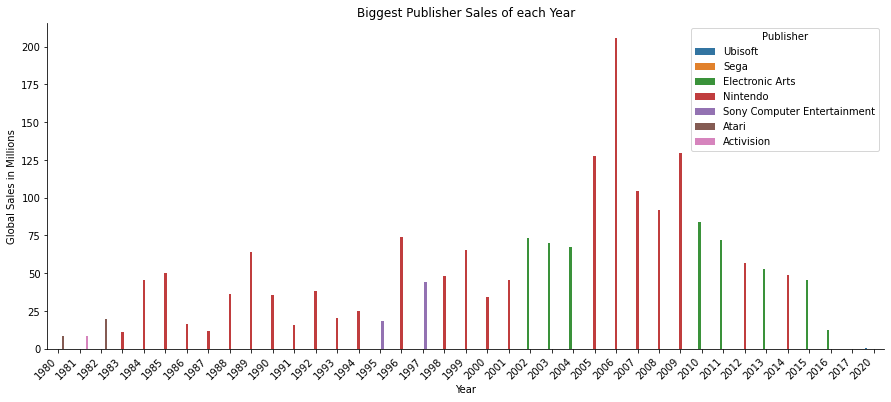

In [23]:
#Need to add a second label 


dx=plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Global_Sales", data=publisher_10year, ci=None, hue="Publisher")
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Biggest Publisher Sales of each Year")

sns.despine()

#Note that Ubisoft is at the top 5 Publishers but net the biggest publisher of the year
#Atari is a big Publisher but never mad at the top 10 after the 80's, never recovered 
#Nintendo dominated the market for so long
#We should consider Nintendo matrics, 
#Sony dominated during the first generation of consoles, we need more data to evaluate today's


In [24]:
#counts = publisher_10year['Publisher'].value_counts()

#publisher_10year['Publisher'] = publisher_10year['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

#publisher_10year

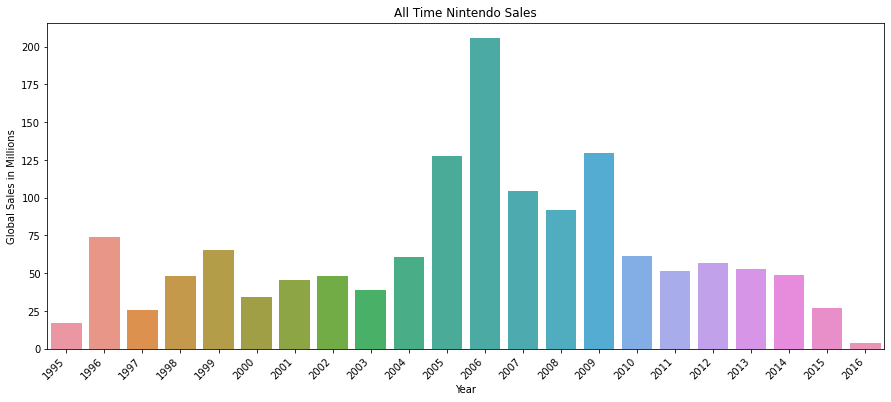

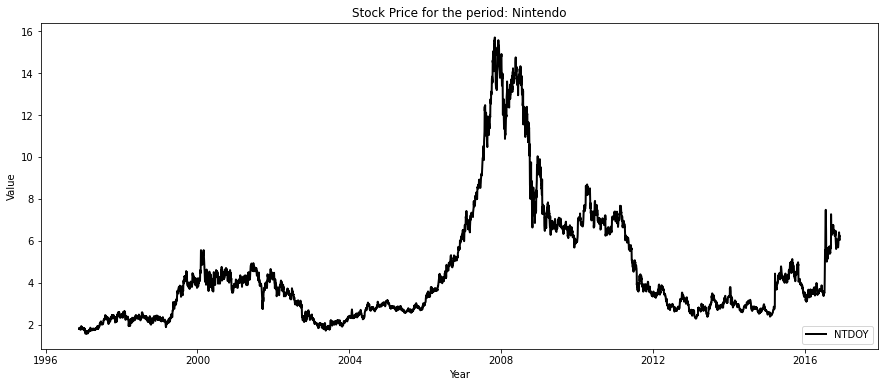

In [60]:
from pandas.plotting import register_matplotlib_converters        #This will fix: ConversionError: Failed to convert value(s) to axis units: '2022-05-01'
register_matplotlib_converters()


#Plotting Publisher All Time Sales  

publisher = "Nintendo"

nintendo_year = df.groupby(["Publisher","Year"]).agg({'Global_Sales':'sum'}).reset_index()

nintendo_year = nintendo_year.loc[nintendo_year["Publisher"] == publisher]

nintendo_year


dx=plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Global_Sales", data=nintendo_year[12:], ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All Time " + publisher + " Sales")


#Adding the Stock Chart 
import pandas_datareader as pdr

ticker = "NTDOY"
start = "1996-01-12"
end = "2016-12-01"
stock = pdr.get_data_yahoo(ticker, start, end)
stock.drop(["Volume", "Adj Close"], axis=1, inplace=True)

plt.figure(figsize=(15,6))
plt.plot(stock["Close"], label = ticker, linewidth = 2, color = "black")
plt.title("Stock Price for the period: "+ publisher)
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend(loc = "lower right")
setup = dict(size = 14, color = "black")
plt.show()



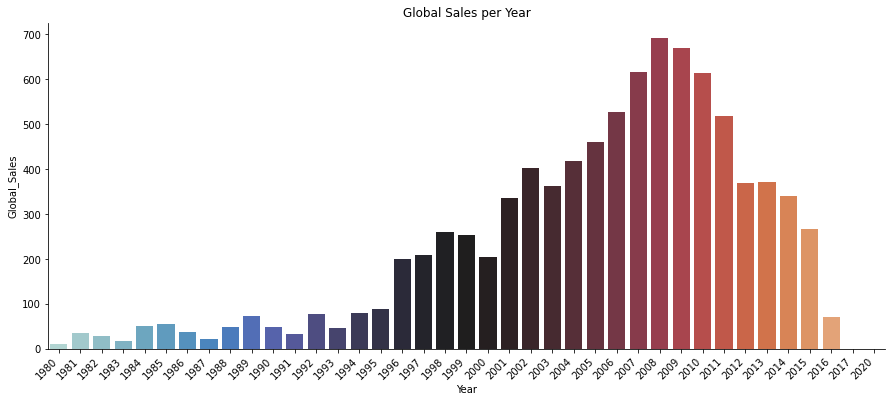

In [27]:
#Global Sales per Year

year = df.groupby(["Year"]).agg({'Global_Sales':'sum'}).reset_index()
year = year.sort_values(by="Global_Sales", ascending=False)


dx = plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Global_Sales", data=year, palette='icefire')
plt.title("Global Sales per Year")
plt.xticks(rotation=45, horizontalalignment='right')
sns.despine()

#Data here might be missing plus we don't have data from new consoles or PC

In [28]:
#Platform Global Sales per year

platform_year = df.groupby(["Platform","Year"]).agg({'Global_Sales':'sum'}).reset_index()


#Picking an specific platform 
platform_year.head(50)

,Platform,Year,Global_Sales
0,2600,1980,11.38
1,2600,1981,35.77
2,2600,1982,28.86
3,2600,1983,5.83
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.66
7,2600,1987,1.98
8,2600,1988,0.75
9,2600,1989,0.62


In [29]:
#sns.pairplot(df, palette = "light:#5A9", kind="reg") 
#plt.show()

#Other Sales x Year might be a good prospecting market 
#Removing Years outliers might be a good idea when prospecting markets 


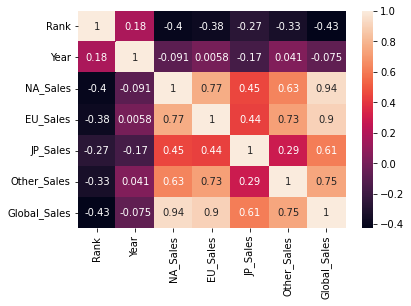

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

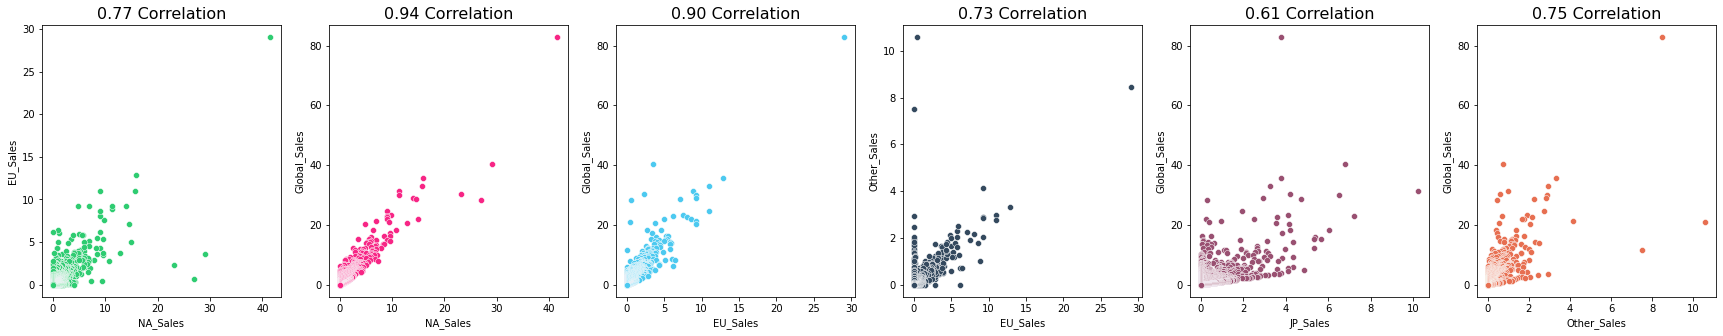

In [31]:
# Checking specific Correlations 

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 5)) 

sns.scatterplot("NA_Sales", "EU_Sales"
                , data = df, ax = ax1, color = "#2ecc71").set_title("0.77 Correlation", fontsize = 16);
sns.scatterplot("NA_Sales", "Global_Sales"
                , data = df, ax = ax2, color = "#F72585").set_title("0.94 Correlation", fontsize = 16);
sns.scatterplot("EU_Sales", "Global_Sales"
                , data = df, ax = ax3, color = "#4CC9F0").set_title("0.90 Correlation", fontsize = 16);
sns.scatterplot("EU_Sales", "Other_Sales"
                , data = df, ax = ax4, color = "#34495e").set_title("0.73 Correlation", fontsize = 16);
sns.scatterplot("JP_Sales", "Global_Sales"
                , data = df, ax = ax5, color = "#995071").set_title("0.61 Correlation", fontsize = 16);
sns.scatterplot("Other_Sales", "Global_Sales"
                , data = df, ax = ax6, color = "#E76F51").set_title("0.75 Correlation", fontsize = 16);
plt.show();

In [32]:
#Creating a new df just with usefull information 


df_clean = df.drop(["Rank","Name","Genre","Publisher", "Platform"], axis=1)

df_clean = df_clean.sort_values(["Year"])

df_clean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,1980,0.22,0.01,0.00,0.00,0.24
2669,1980,0.72,0.04,0.00,0.01,0.77
258,1980,4.00,0.26,0.00,0.05,4.31
1766,1980,1.07,0.07,0.00,0.01,1.15
5366,1980,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...
16260,2016,0.01,0.00,0.00,0.00,0.01
16438,2017,0.00,0.00,0.01,0.00,0.01
14390,2017,0.00,0.00,0.03,0.00,0.03
16241,2017,0.00,0.00,0.01,0.00,0.01


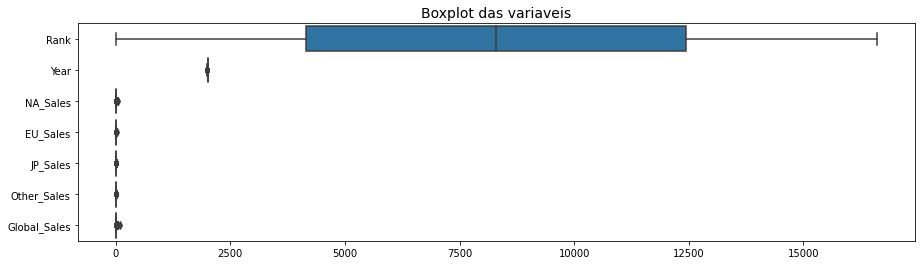

In [33]:
# O mesmo seria válido para o boxplot

plt.figure(figsize = (15, 4))
sns.boxplot(data = df, orient = "h").set_title("Boxplot das variaveis", fontsize = 14)
plt.show()

In [34]:
# Como o DBSCAN é sensível à dimensionalidade, vamos padronizar os dados

# Inicializa o scaler
scaler = StandardScaler()

# Padroniza o df sem NaNs
df_padronizado = scaler.fit_transform(df_clean)

# Converte o array padronizado de volta para um dataframe
# com as mesmas colunas do outro
df_padronizado = pd.DataFrame(df_padronizado, columns = df_clean.columns)

df_padronizado

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-4.532692,-0.055116,-0.270460,-0.251777,-0.255151,-0.191621
1,-4.532692,0.556203,-0.211184,-0.251777,-0.202205,0.148695
2,-4.532692,4.566454,0.223501,-0.251777,0.009578,2.421748
3,-4.532692,0.984126,-0.151909,-0.251777,-0.202205,0.392695
4,-4.532692,0.067148,-0.250701,-0.251777,-0.255151,-0.127410
...,...,...,...,...,...,...
16535,1.646836,-0.311869,-0.290218,-0.251777,-0.255151,-0.339305
16536,1.818490,-0.324096,-0.290218,-0.219497,-0.255151,-0.339305
16537,1.818490,-0.324096,-0.290218,-0.154938,-0.255151,-0.326463
16538,1.818490,-0.324096,-0.290218,-0.219497,-0.255151,-0.339305


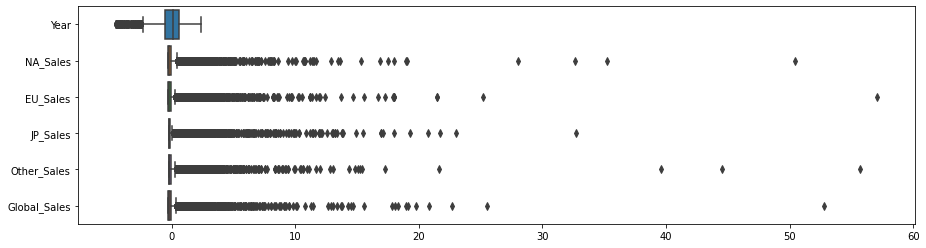

In [35]:
# Se repetimos a visualização do boxplot, vemos o efeito da padronização 
# que esta com média zero e desvio padrão 1

plt.figure(figsize = (15,4))
sns.boxplot(data = df_padronizado, orient = "h")
plt.show()

In [36]:
y = df_clean['Global_Sales'].copy()

x = df_clean.drop(['Global_Sales'], axis=1)

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [38]:
from sklearn.neighbors import KNeighborsRegressor

kRange = range(1,15,1)
scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    regressor_knn.fit(xtrain,ytrain)
    ypred = regressor_knn.predict(xtest)
rmse_knn = math.sqrt(mean_squared_error(ytest, ypred))
scoreknn=r2_score(ytest, ypred)


print('R2 Score',f'{r2_score(ytest, ypred):.2f}')
print(f"Root Mean Squared Error of the model : {rmse_knn:.3f}")

R2 Score 0.94
Root Mean Squared Error of the model : 0.269


In [39]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
ypredxgb = xgb.predict(xtest)
rmse_xgp = math.sqrt(mean_squared_error(ytest, ypredxgb))
scorexgb=r2_score(ytest, ypredxgb)

print('R2 Score',r2_score(ytest, ypredxgb))
print(f"Root Mean Squared Error of the model : {rmse_xgp:.3f}")


R2 Score 0.9920908920731929
Root Mean Squared Error of the model : 0.101


In [40]:
import numpy as np
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(xtrain, ytrain)

ypred = dtr.predict(xtest)
rmse_dtr = math.sqrt(mean_squared_error(ytest, ypred))
scoredtr=r2_score(ytest, ypred)
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_dtr:.3f}")

R2 Score 0.9711445969609259
Root Mean Squared Error of the model : 0.193


In [41]:
rfr = RandomForestRegressor(random_state= 10)
rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)
rmse_rfr = math.sqrt(mean_squared_error(ytest, ypred))
scorerfr=r2_score(ytest, ypred)

print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_rfr:.3f}")

R2 Score 0.99275590837487
Root Mean Squared Error of the model : 0.096


In [42]:
mlp=MLPRegressor()
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)
rmse_mlp = math.sqrt(mean_squared_error(ytest, ypred))
scoremlp=r2_score(ytest, ypred)

print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_mlp:.3f}")

R2 Score 0.9999396424906816
Root Mean Squared Error of the model : 0.009


R2 Score 0.9999785732144499
Root Mean Squared Error of the model : 0.005


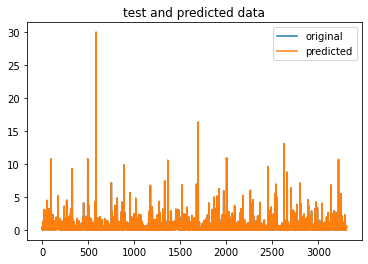

In [43]:
lnr= LinearRegression()
lnr.fit(xtrain, ytrain)
ypred = lnr.predict(xtest)
rmse_lnr = math.sqrt(mean_squared_error(ytest, ypred))
scorelnr=(r2_score(ytest, ypred))
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_lnr:.3f}")


#Not a very useful chart 
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

In [44]:
#Plotting all results

print("KNR")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_knn:.3f}")

print("--------------------------------------------------------")

print("XRB")
print('R2 Score',r2_score(ytest, ypredxgb))
print(f"Root Mean Squared Error: {rmse_xgp:.3f}")

print("--------------------------------------------------------")

print("Decision Tree")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_dtr:.3f}")

print("--------------------------------------------------------")

print("Random Forest")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_rfr:.3f}")

print("--------------------------------------------------------")

print("MLP")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_mlp:.3f}")

print("--------------------------------------------------------")

print("Linear Regression")
print('R2 Score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error: {rmse_lnr:.3f}")


KNR
R2 Score 0.9999785732144499
Root Mean Squared Error: 0.269
--------------------------------------------------------
XRB
R2 Score 0.9920908920731929
Root Mean Squared Error: 0.101
--------------------------------------------------------
Decision Tree
R2 Score 0.9999785732144499
Root Mean Squared Error: 0.193
--------------------------------------------------------
Random Forest
R2 Score 0.9999785732144499
Root Mean Squared Error: 0.096
--------------------------------------------------------
MLP
R2 Score 0.9999785732144499
Root Mean Squared Error: 0.009
--------------------------------------------------------
Linear Regression
R2 Score 0.9999785732144499
Root Mean Squared Error: 0.005


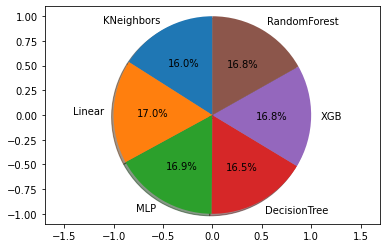

In [45]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels_acc = 'KNeighbors', 'Linear', 'MLP', 'DecisionTree','XGB','RandomForest'
acc = [scoreknn,  scorelnr, scoremlp,scoredtr,scorexgb,scorerfr]
explode = (0, 0,0,0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(acc, explode=explode, labels=labels_acc, autopct='%1.1f%%',
        shadow=True, startangle=90, frame=True)
ax1.axis('equal') 
plt.show()

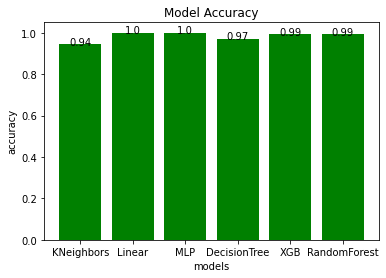

In [46]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,  y[i], y[i], ha = 'center')

if __name__ == '__main__':
    x = ['KNeighbors', 'Linear', 'MLP', 'DecisionTree','XGB','RandomForest']
    y = [scoreknn,  scorelnr, scoremlp,scoredtr,scorexgb,scorerfr]
    y_=[float(f'{scoreknn:.2f}'),float(f'{scorelnr:.2f}'),float(f'{scoremlp:.2f}'),float(f'{scoredtr:.2f}'), float(f'{scorexgb:.2f}'),float(f'{scorerfr:.2f}')] 
    plt.bar(x, y,color='green')
    addlabels(x, y_)
    plt.title("Model Accuracy")
    plt.xlabel("models")
    plt.ylabel("accuracy")
    plt.show()

